# Reading Data from Web Sites

Many times you want to add external data to your analysis. External data is often found in external web sites, usually in the format of an HTML table. You can import HTML directly into Excel using _"Import"_.

In this notebook, we will learn how to use pandas _read_html_ to load tables from web site with ease, including cases where the data is complex to retrieve. 

## Loading HTML data

We will load a few tables from simple sites as well as complex ones

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

## Loading from simple web sites 

If you have a simple web page with a few tables, you can pass the URL of the page to Pandas and call read_html. 

In [3]:
url = 'https://en.wikipedia.org/wiki/The_Championships,_Wimbledon'
dfs = (
    pd
    .read_html(url)
)

read_html is returning a list of all the tables in the page. We can scroll through the content of the tables on that page, by changing the index in the list. We can print the third element (index 2 in the list), we will get the table with the prize amounts for the Wimbeldon Tennis competition.

In [4]:
dfs[2]

,Unnamed: 0,ATP,WTA
0,First round,10,10
1,Second round,45,70
2,Third round,90,130
3,Fourth round,180,240
4,Quarterfinalist,360,430
5,Semifinalist,720,780
6,Runner-up,1200,1300
7,Champion,2000,2000


## Loading from complex web sites

Many times pages will be more complex and we can still extract the relevant data. 

In [5]:
url = 'https://ncov2019.live/data'
table_id = 'sortable_table_world'

Here we will look like a browser to the web site, as some web sites block their context to bots and crawlers. Since we are not hitting the web site a lot, pretending to be a browser is considered as acceptable usage. 

We will send to the web site a header that a browser is sending and get the reply of the page as text. The text (_r.text_) will be parsed by the _read_html_ function and create the dataframe. We will also add the HTML id of the table that we want. This id (_'sortable_table_world'_) can be found when using the _inspect_ option in Chrome, Safari, Firefox and other browsers. 

In [6]:
import requests

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

response = requests.get(url, headers=header)

df_list = (
  pd
  .read_html(
    response.text, 
    attrs={'id': table_id}
  )
)


In [7]:
df_list[0]

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,"105,436,064 +36,466",13510,36466,0.03%,105750,"2,294,862 +2,113",294,"2,294,862 +2,113",0.09%,"1,472,825,251 +906,272",26069983,"77,056,312 +39,017",9873,7804453604
1,★ Afghanistan,55265,1401,0,0%,974,2407,61,0,0%,258108,4863,47995,1217,39446469
2,★ Albania,81993,28510,0,0%,21,1418,493,0,0%,368733,31032,49543,17227,2875914
3,★ Algeria,108381,2445,0,0%,42,2904,66,0,0%,Unknown,Unknown,74136,1673,44320348
4,★ Andorra,10137,0,0,0%,15,103,0,0,0%,180088,639,9395,0,77339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,★ Montserrat,13,0,0,0%,Unknown,1,0,0,0%,930,0,12,0,4994
217,★ Western Sahara,10,0,0,0%,Unknown,1,0,0,0%,Unknown,Unknown,8,0,606007
218,★ Wallis and Futuna,5,0,0,0%,Unknown,Unknown,Unknown,0,0%,1202,Unknown,4,0,11120
219,★ Micronesia,1,0,0,0%,Unknown,Unknown,Unknown,0,0%,Unknown,Unknown,1,0,115741


In [8]:
covid_19_status = df_list[0]

## Simple Data Visualization

External data is often "messy", and it is a best practice to clean it up before staring to work with it. In the next cell we will make sure that the numeric columns are indeed numeric (removing "Unknown", for example). We will also resolve the conflict of having multiple columns with the same name ("Per Million", in this exammple), and translate to more meaningful names.
* Start with the Covid-19 status table
* Convert the first 'Per Million' column from the table to be numeric
* Convert the second 'Per Million' column from the table to be numeric
* Fill missing values in the table with 0
* Sort the table in decreasing order by number of deceased cases
* Take the first top 20 country rows
* Plot the results
* as bar graph with the name of the country and the number of deceased cases per million people


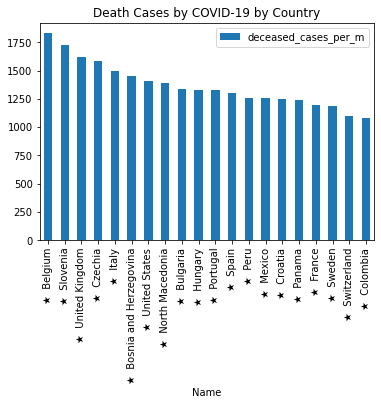

In [9]:
(
    covid_19_status
    .assign(confirmed_cases_per_m=lambda x: pd.to_numeric(x['Per Million'],  errors='coerce'))
    .assign(deceased_cases_per_m=lambda x: pd.to_numeric(x['Per Million.1'],  errors='coerce'))
    .fillna(0)
    .sort_values(by='deceased_cases_per_m',ascending=False)
    .iloc[:20,:]
    .plot
    .bar(
        x='Name', 
        y='deceased_cases_per_m',
        title='Death Cases by COVID-19 by Country')
);

## More examples

### Using Functions 

Functions are a more complicated topic and you are not expected to write functions most of the times. Functions are also available in Excel as Macros. You should be familiar with using functions, read them to understand what they do, and also modifying them to fit your needs.

We often find the a set of commands is repeating itself many times in our analyses. This is the time to wrap these commands as a function. In the next cell, we will create a function that is wrapping a few of the commands that we used in the previous cells such as choosing a specific index of a table from the table list and setting the first row as header.
* Read the HTML content of the given URL
* Parse the HTML and extract all the tables in it
* Take the first (of other given index) table from that list
* Set the header of the table from the values in the first row
* Skip the first (header) row
* Return that table

In [10]:
def get_table_from_html(url, attrs=None, index=0):
    response = requests.get(url, headers=header)
    df_list = pd.read_html(response.text, attrs=attrs)
    df = df_list[index]
    df.columns = df.iloc[0]
    df = df[1:]
    return df

Once we have the function defined (_def_), we can try it in a simple way. Let's say that we want to add to our CRM (Customer Relationship Management) system a new target market, as the consumer good companies (CPG). We find in the web a table with the top CPG companies for 2019. 

In [11]:
url_top_companies = 'https://consumergoods.com/top-100-consumer-goods-companies-2019'
df = get_table_from_html(url_top_companies)

Let's look at the table

In [12]:
df.style

0,Rank/Company,Net Revenue ($M),1-Year Sales Growth,Key Product Categories
1,1. Nestle SA*,"$92,085",2.10%,"Food, Beverage, Confectionery"
2,2. Procter & Gamble,"$66,832",2.70%,"Household Goods, Health & Beauty Aids, OTC Pharma"
3,3. PepsiCo,"$64,661",1.80%,"Food, Beverage"
4,4. Unilever N.V.*,"$56,188",-5.10%,"Household Goods, Food, Health & Beauty Aids"
5,5. Anheuser-Busch InBev,"$54,619",-3.20%,Wine & Spirits
6,6. Christian Dior*,"$51,607",7.20%,"Apparel/Footwear/Accessories, Wine & Spirits, Health & Beauty Aids"
7,7. LVMH Moët Hennessy Louis Vuitton*,"$51,607",9.80%,"Apparel/Footwear/Accessories, Wine & Spirits, Health & Beauty Aids"
8,8. JBS S.A.*,"$44,587",11.30%,Food
9,9. Tyson Foods,"$40,052",4.70%,Food
10,10. Nike Inc.,"$36,397",6.00%,Apparel/Footwear/Accessories


### Cleaning the data

We see that the table has a column with both the rank and the name of the company, and we want to have only the name of company in a column (as we have the rank in the index of the table). There are a fwe options to do it using string functions such as _RIGHT_ or _LEFT_. In this case, you could use:

```excel
RIGHT(cell,LEN(cell)-SEARCH("char", cell))
```

In this example, we will use a powerful tool of regular expression (regex). We will not dive into the syntax of regex now, and it time you will find it easier to read or even write. 

In [13]:
clean_names_df = (
    df
    .assign(company_name = lambda x : x['Rank/Company'].str.extract(r'\d+. ([^*]*)[*]?'))
)

The next manipulation that we want to do is to have a numeric column with the annual revenues. The data in the table is in millions (which is better for presentation purposes). We will run two manipulations on the data:
* Start with the clean verion of the table data frame above
* Remove the dollar sign (_$_) and the comma (_,_) from the 'Net Revenue' Column
* Convert the above value to number and scale it to dollars by multipling by a million

In [14]:
clean_names_df = (
    clean_names_df
    .assign(annual_num = lambda x : x['Net Revenue ($M)'].replace('[\$,]', '', regex=True))
    .assign(annual_revenues = lambda x : pd.to_numeric(x.annual_num)*10**6)
)

In [15]:
clean_names_df.head()

,Rank/Company,Net Revenue ($M),1-Year Sales Growth,Key Product Categories,company_name,annual_num,annual_revenues
1,1. Nestle SA*,"$92,085",2.10%,"Food, Beverage, Confectionery",Nestle SA,92085,92085000000
2,2. Procter & Gamble,"$66,832",2.70%,"Household Goods, Health & Beauty Aids, OTC Pharma",Procter & Gamble,66832,66832000000
3,3. PepsiCo,"$64,661",1.80%,"Food, Beverage",PepsiCo,64661,64661000000
4,4. Unilever N.V.*,"$56,188",-5.10%,"Household Goods, Food, Health & Beauty Aids",Unilever N.V.,56188,56188000000
5,5. Anheuser-Busch InBev,"$54,619",-3.20%,Wine & Spirits,Anheuser-Busch InBev,54619,54619000000


### Enriching the data

The next column we want to add to our table before importing it to our CRM system is domain of the company. We will need to use for it a search engine such as Google and a python library that is wrapping it to make it easy for us to use it. First, let's install the python library:


In [16]:
pip install google

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 45 kB 363 kB/s 
Note: you may need to restart the kernel to use updated packages.


Now, let's try it on one of the company names

In [17]:
from googlesearch import search
for url in search('Nestle', stop=1):
    print(url)

https://www.nestle.com/


The above cell is using a powerful concept in programming called _for-loop_ or _list-comprehesion_. However, we will try to minimize this programming concept and convert it to a simpler command that is returning the first value

In [18]:
next(search('Hasbro Inc.', stop=1),'Nope')

'https://shop.hasbro.com/en-us'

#### Search Domain Function

Now we can see the following function that will return to us the domain name of every company we will call it. The function is using various complicated concepts such as regex that we already saw, and _try-except_ part which is used to handle errors (what happened if we don't find a domain name). The function is also waiting 20 seconds before calling the search engine to avoid exceeding some limits that systems are putting against bots (which we just created). The _sleep_ will make the actual run of the data much longer, but it is still automated and we don't need to run this repeative task manually.


For now, we don't need to understand these details:
* Wait 20 seconds between calls to avoid throttling by Google
* Search for the website of the name of the company and return the first result
* Extract the format of the http or https of the above result
* Take the first match 
* Return the match or 'NA' if not found

In [19]:
import re
import time

def search_domain(company_name):
    time.sleep(20)
    try: 
        domain = next(search(str(company_name)+' website', stop=1))
        m = re.search('https?://.*?\.?([0-9a-z-]+\.co[^/]+)/.*', domain)
        answer = m.group(1) 
    except:
        answer = 'NA'
    return answer

Let's test it with one of the compamy names

In [20]:
search_domain('3M co.')

'3m.com'

Now it is time to call our _search\_domain_ function on all the rows in our table. This will take an hour or so, due to our _sleep_ time between the calls. For now, let's run it only on the head (first 5) of the table.

In [21]:
clean_names_df_head = clean_names_df.head()
clean_names_df_head['domain'] = (
    clean_names_df_head
    .company_name
    .apply(search_domain)
)


In [22]:
clean_names_df_head

,Rank/Company,Net Revenue ($M),1-Year Sales Growth,Key Product Categories,company_name,annual_num,annual_revenues,domain
1,1. Nestle SA*,"$92,085",2.10%,"Food, Beverage, Confectionery",Nestle SA,92085,92085000000,nestle.com
2,2. Procter & Gamble,"$66,832",2.70%,"Household Goods, Health & Beauty Aids, OTC Pharma",Procter & Gamble,66832,66832000000,pg.com
3,3. PepsiCo,"$64,661",1.80%,"Food, Beverage",PepsiCo,64661,64661000000,pepsico.com
4,4. Unilever N.V.*,"$56,188",-5.10%,"Household Goods, Food, Health & Beauty Aids",Unilever N.V.,56188,56188000000,unilever.com
5,5. Anheuser-Busch InBev,"$54,619",-3.20%,Wine & Spirits,Anheuser-Busch InBev,54619,54619000000,ab-inbev.com


### Writing to CSV/Excel file

Once we finished our table creation, we can write it as a file that we can later import to our CRM system.

In [24]:
(
    clean_names_df
    .to_csv(
        '../data/top_100_cpg_companies.csv',
        index=False
        )
)
